In [3]:
from udma import *
import numpy as np
import matplotlib.pyplot as plt

In [4]:
cb=UDMA_CLASS("192.168.1.10", 7)
cb.connect()

1

In [5]:
def initial_setup(comblock=0):
    # Select comblock
    cb.select_comblock(comblock)

    # Reset HiCCE
    cb.write_reg(5, 0) #RESET ON
    cb.write_reg(5, 1) #RESET OFF

    #Disable Acquisiton 
    cb.write_reg(4, 0)
    
    # FIFO Clear
    cb.write_reg(17, 1)
    cb.write_reg(17, 0)

    # Configure INTANT (Reset Counter)
    cb.write_reg(0, 6150)
    cb.write_reg(1, 6150)
    cb.write_reg(2, 6150)
    cb.write_reg(3, 6150)

    # Configure INTANT (Cyclic Read)
    cb.write_reg(0, 6182)
    cb.write_reg(1, 6182)
    cb.write_reg(2, 6182)
    cb.write_reg(3, 6182)

    # Configure INTANT (Enable Acquisition)
    # cb.write_reg(4, 15)

In [6]:
def loop_setup(comblock=0):
    # Select comblock
    cb.select_comblock(comblock)

    # Reset HiCCE
    cb.write_reg(5, 0) #RESET ON
    cb.write_reg(5, 1) #RESET OFF

    # #Disable Acquisiton 
    cb.write_reg(4, 0)
    
    # FIFO Clear
    cb.write_reg(17, 1)
    cb.write_reg(17, 0)
    
    # Configure INTANT (Enable Acquisition)
    cb.write_reg(4, 15)
    sleep(1)
    cb.write_reg(4, 0)  

In [42]:
#Data Request

In [7]:
Nchannels=32
ch=[]
for i in range(Nchannels*2):
    ch.append([])

def all_channels(data):       
    for i in range(len(data)):
        ls_16_bits = data[i] & 0xFFFF
        ms_16_bits = data[i] >> 16
        
        # check if the value is negative and if negative convert using tow's complement
        if ls_16_bits >= 0x8000: 
            ls_16_bits = -((~ls_16_bits & 0xFFFF) + 1)
        if ms_16_bits >= 0x8000: 
            ms_16_bits = -((~ms_16_bits & 0xFFFF) + 1)       
        
        ch[i%Nchannels].append(ls_16_bits)
        ch[(i%Nchannels)+Nchannels].append(ms_16_bits)

In [8]:
from time import sleep

initial_setup()
print(cb.read_reg(34)[1][0]&0xf)
sample_number =  5 # Total samples will be sample_number * 100

cb.write_reg(4, 15)
sleep(1)
cb.write_reg(4, 0)

for i in range(sample_number):   
    # Collect Data
    data = cb.read_fifo(3200)
    print(data[0])
    
    # All channels' data
    all_channels(data[1])
    # sleep(0.005)
    
    # Setup for data acquisition
    loop_setup()
    
print(len(ch[1])) 

0
(1, 3200)
(1, 3200)
(1, 3200)
(1, 3200)
(1, 3200)
500


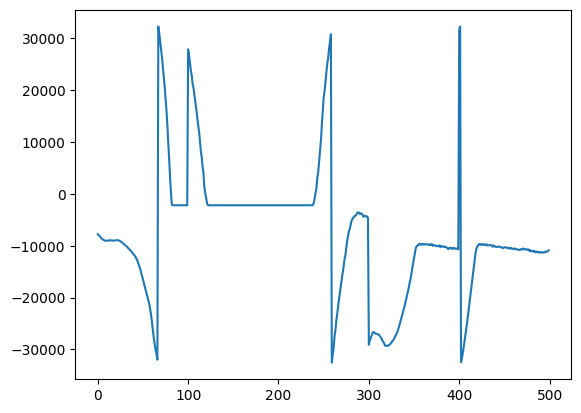

In [9]:
plt.plot(ch[11])

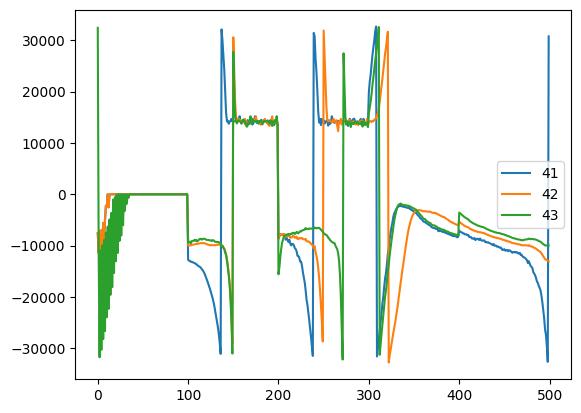

In [11]:
# %matplotlib ipympl
for i in range(41, 44):
    plt.plot(ch[i], label=i)
    plt.legend()

# plt.show()

In [190]:
1500 % 32

28

In [ ]:
line = 1 #0 - 31. Two channels per line.
t = 1
while(t):
    data = cb.read_fifo(16384)
    
    channel_line_lower = []
    channel_line_upper = []
    for i in range(line,len(data[1]), 32):
        lat_16_bits = data[1][i] & 0xFFFF
        fast_16_bits = data[1][i] >> 16

        # print(lat_16_bits, " ", hex(lat_16_bits))
        channel_line_lower.append(lat_16_bits)
        channel_line_upper.append(fast_16_bits)
        # print(fast_16_bits, " ", hex(fast_16_bits))
    
    t = t - 1
    
x = np.linspace(0, 1, len(channel_line_lower))
y1 = channel_line_lower
y2 = channel_line_upper

plt.plot(y1)
plt.plot(y2)

In [ ]:
from scipy.misc import electrocardiogram
ecg = electrocardiogram()
ecg

In [ ]:
fs = 360
time = np.arange(ecg.size) / fs
plt.plot(time, ecg)

plt.xlabel('Time in s')
plt.ylabel('ECG in mV')
plt.show()

In [ ]:
fs = 360
time = np.arange(ecg.size) / fs
plt.plot(time, ecg)

plt.xlabel('Time in s')
plt.ylabel('ECG in mV')
plt.xlim(9, 10.2)
plt.ylim(-1, 1.5)
plt.show()

In [ ]:
time = np.arange(ecg.size) / fs
print(np.arange(ecg.size))

In [ ]:
fs = 360
time = np.arange(len(data[1])) / fs
plt.plot(time, data[1])

plt.xlabel('Time in s')
plt.ylabel('ECG in mV')
# plt.xlim(9, 10.2)
# plt.ylim(-1, 1.5)
plt.show()

In [ ]:
as